<a href="https://colab.research.google.com/github/deepjyotisaha85/eva4/blob/master/session13/S13_YoloV3_CustomDataset_Tanks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/deepjyotisaha85/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 160 (delta 8), reused 155 (delta 7), pack-reused 0
Receiving objects: 100% (160/160), 12.74 MiB | 6.92 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls 

gdrive	sample_data  YoloV3


In [4]:
!ls "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13"

opencvyolov3		S13-YoloV3-CustomDataset.ipynb	yolov3
S13-OpenCVYoloV3.ipynb	seed-data			YoloV3Sample.ipynb


In [5]:
!ls "/content/YoloV3"

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


In [0]:
!rm -rf "/content/YoloV3/data/customdata/images/"
!rm -rf "/content/YoloV3/data/customdata/labels/"

In [0]:
!cp "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/yolov3-spp-ultralytics.pt" "/content/YoloV3/weights/"

In [0]:
#!cp -r "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/images/" "/content/YoloV3/data/customdata/"

In [0]:
#!cp -r "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/labels/" "/content/YoloV3/data/customdata/"

In [0]:
#!cp -R "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/custom.names" "/content/YoloV3/data/customdata/"

In [0]:
#!cp -R "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/custom.txt" "/content/YoloV3/data/customdata/"

In [8]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [9]:
ls

gdrive/  sample_data/  YoloV3/


In [0]:
!cp -r "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/images/" "/content/YoloV3/data/customdata/"
!cp -r "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/labels/" "/content/YoloV3/data/customdata/"
!cp -R "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/custom.names" "/content/YoloV3/data/customdata/"
!cp -R "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/custom.txt" "/content/YoloV3/data/customdata/"

In [11]:
cd YoloV3/

/content/YoloV3


In [12]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


In [13]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-25 01:50:57.606662: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 6620.84it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 118.66it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00,

In [14]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-25 01:51:37.954523: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (51 found, 0 missing, 0 empty, 0 duplicate, for 51 images): 100% 51/51 [00:00<00:00, 9567.47it/s]
Caching images (0.0GB): 100% 51/51 [00:00<00:00, 214.86it/s]
Reading image shapes: 100% 51/51 [00:00<00:00, 3579.72it/s]
Caching labels (51 found, 0 missi

In [15]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/51 data/customdata/images/img001.jpg: 384x512 1 battletanks, Done. (0.019s)
image 2/51 data/customdata/images/img002.jpg: 384x512 1 battletanks, Done. (0.017s)
image 3/51 data/customdata/images/img003.jpg: 384x512 1 battletanks, Done. (0.017s)
image 4/51 data/customdata/images/img004.jpg: 384x512 2 battletanks, Done. (0.017s)
image 5/51 data/customdata/images/img005.jpg: 384x512 1 battletanks, Done. (0.017s)
image 6/51 data/customdata/images/img006.jpg: 320x512 1 battletanks, Done. (0.017s)
image 7/51 

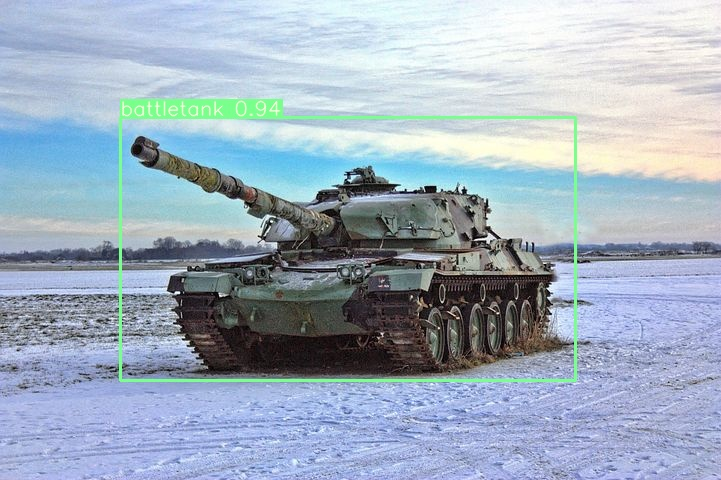

In [16]:
Image(filename='out_out/img001.jpg', width=600)

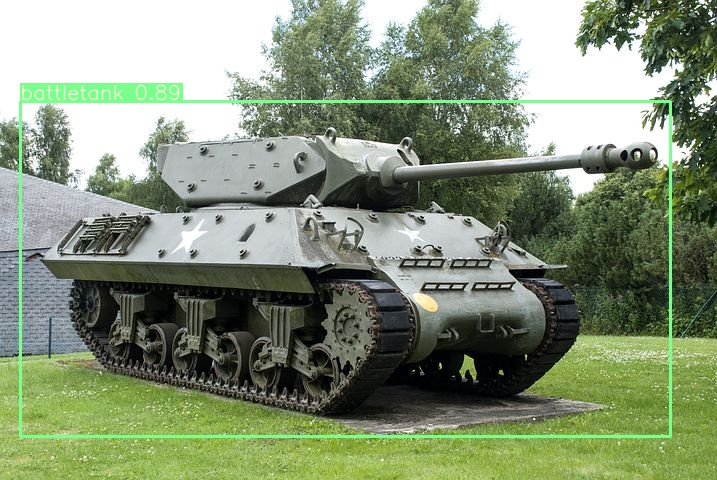

In [17]:
Image(filename='out_out/img002.jpg', width=600)

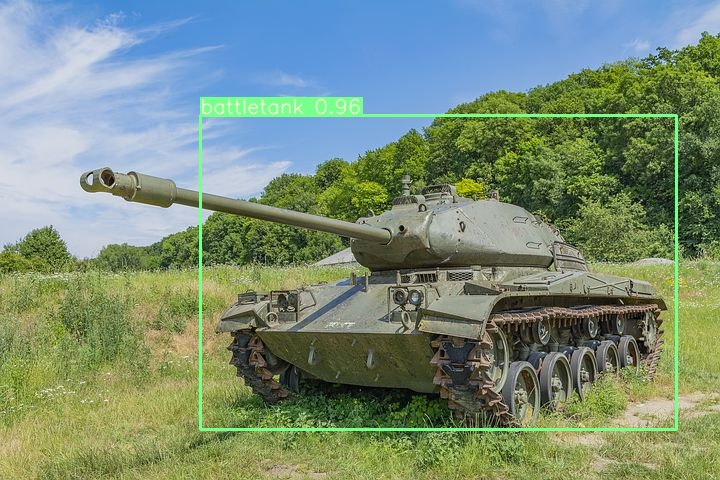

In [18]:
Image(filename='out_out/img003.jpg', width=600)

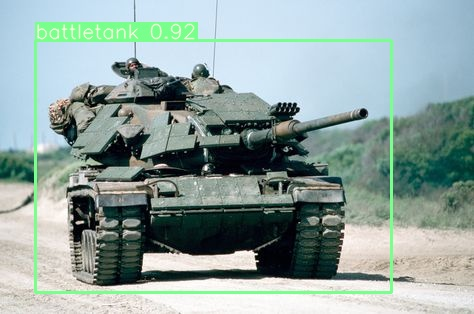

In [19]:
Image(filename='out_out/img020.jpg', width=600)

In [22]:
!python3 detect.py --weights weights/last.pt  --cfg "cfg/yolov3-custom.cfg" --names data/customdata/custom.names --source "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/India_RD_Parade_Battle_Tanks.mp4"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='output', save_txt=False, source='/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/India_RD_Parade_Battle_Tanks.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/2483) /content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/India_RD_Parade_Battle_Tanks.mp4: 320x512 Done. (0.017s)
video 1/1 (2/2483) /content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/India_RD_Parade_Battle_Tanks.mp4: 320x512 Done. (0.016s)
video 1/1 (3/2483) /content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/India_RD_Parade_Battle_Tanks.mp4: 320x512 Done. (0.016s)
video 1/1 

In [0]:
!cp -r "/content/YoloV3/output/India_RD_Parade_Battle_Tanks.mp4" "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 13/seed-data/India_RD_Parade_Battle_Tanks_Processed.mp4" 